# Keyword vs. Target

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("train.csv")

En este análisis se intentará encontrar la relación entre las keyword y los target.

In [3]:
len(df) #Cantidad de filas del dataframe

7613

In [4]:
df["keyword"].count() #Cantidad de filas del dataframe con keywords

7552

In [5]:
df["keyword"].count()/len(df)*100 #Porcentaje de filas con keyword respecto al total

99.19873899908052

In [6]:
df["keyword"].value_counts() #Cantidad de valores diferentes de keyword junto con su frecuencia

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [7]:
k1 = df[df["target"]==1]["keyword"].value_counts() #Cantidad de apariciones de cada keyword en el target 1
k1

outbreak       39
wreckage       39
derailment     39
typhoon        37
oil%20spill    37
               ..
epicentre       1
electrocute     1
blazing         1
body%20bags     1
ruin            1
Name: keyword, Length: 220, dtype: int64

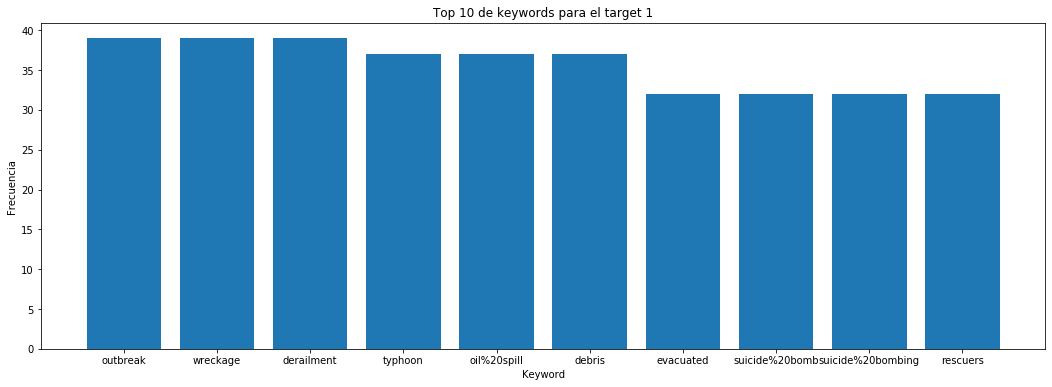

In [8]:
plt.figure(figsize=(18, 6))
plt.bar(k1.iloc[0:10].index, k1.iloc[0:10])
plt.title("Top 10 de keywords para el target 1")
plt.xlabel("Keyword")
plt.ylabel("Frecuencia")
plt.show()

In [9]:
k0 = df[df["target"]==0]["keyword"].value_counts() #Cantidad de apariciones de cada keyword en el target 0
k0

body%20bags          40
harm                 37
armageddon           37
deluge               36
ruin                 36
                     ..
oil%20spill           1
typhoon               1
outbreak              1
suicide%20bomber      1
suicide%20bombing     1
Name: keyword, Length: 218, dtype: int64

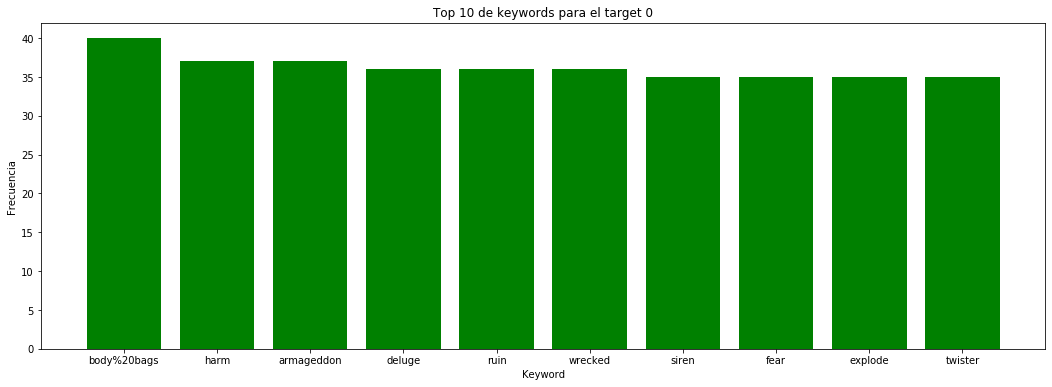

In [10]:
plt.figure(figsize=(18, 6))
plt.bar(k0.iloc[0:10].index, k0.iloc[0:10], color="green")
plt.title("Top 10 de keywords para el target 0")
plt.xlabel("Keyword")
plt.ylabel("Frecuencia")
plt.show()

In [11]:
k1_unique = pd.Series()
for k in k1.index:
    if k not in k0:
        k1_unique = k1_unique.append(pd.Series(index=(k,), data=k1[k]))

In [12]:
k1_unique #Keywords que solo aparecen en el target 1

wreckage      39
derailment    39
debris        37
dtype: int64

In [13]:
k0_unique = pd.Series()
for k in k0.index:
    if k not in k1:
        k0_unique = k0_unique.append(pd.Series(index=(k,), data=k0[k]))

In [14]:
k0_unique #Keywords que solo aparecen en el target 0

aftershock    34
dtype: int64

In [15]:
df_keywords_en_ambas = pd.DataFrame(columns=["keyword", "target_1", "target_0", "relacion_1_sobre_0"])

In [16]:
for x in df["keyword"].value_counts().iteritems():
    if x[0] in k1_unique.index or x[0] in k0_unique.index:
        continue
    df_keywords_en_ambas = df_keywords_en_ambas.append({"keyword":x[0], "target_1":k1[x[0]], "target_0":k0[x[0]]}, ignore_index=True)

In [17]:
df_keywords_en_ambas["relacion_1_sobre_0"] = (df_keywords_en_ambas["target_1"]/df_keywords_en_ambas["target_0"])

In [18]:
df_keywords_en_ambas #Keywords que están en ambos targets junto con su cantidad en cada uno y la relación del 1 sobre 0

,keyword,target_1,target_0,relacion_1_sobre_0
0,fatalities,26,19,1.36842
1,armageddon,5,37,0.135135
2,deluge,6,36,0.166667
3,body%20bags,1,40,0.025
4,sinking,8,33,0.242424
...,...,...,...,...
212,forest%20fire,15,4,3.75
213,epicentre,1,11,0.0909091
214,threat,2,9,0.222222
215,inundation,2,8,0.25


In [19]:
df_keywords_casi_unicas = df_keywords_en_ambas.groupby("keyword").filter(lambda x: x["relacion_1_sobre_0"].max()<0.1 or x["relacion_1_sobre_0"].max()>10)
df_keywords_casi_unicas #Keywords con una relación mayor o igual de 10 a 1 respecto de un target con otro

,keyword,target_1,target_0,relacion_1_sobre_0
3,body%20bags,1,40,0.025
10,outbreak,39,1,39
24,wrecked,3,36,0.0833333
36,explode,3,35,0.0857143
37,typhoon,37,1,37
41,oil%20spill,37,1,37
44,panic,3,34,0.0882353
59,ruin,1,36,0.0277778
68,screaming,2,34,0.0588235
85,bloody,3,32,0.09375


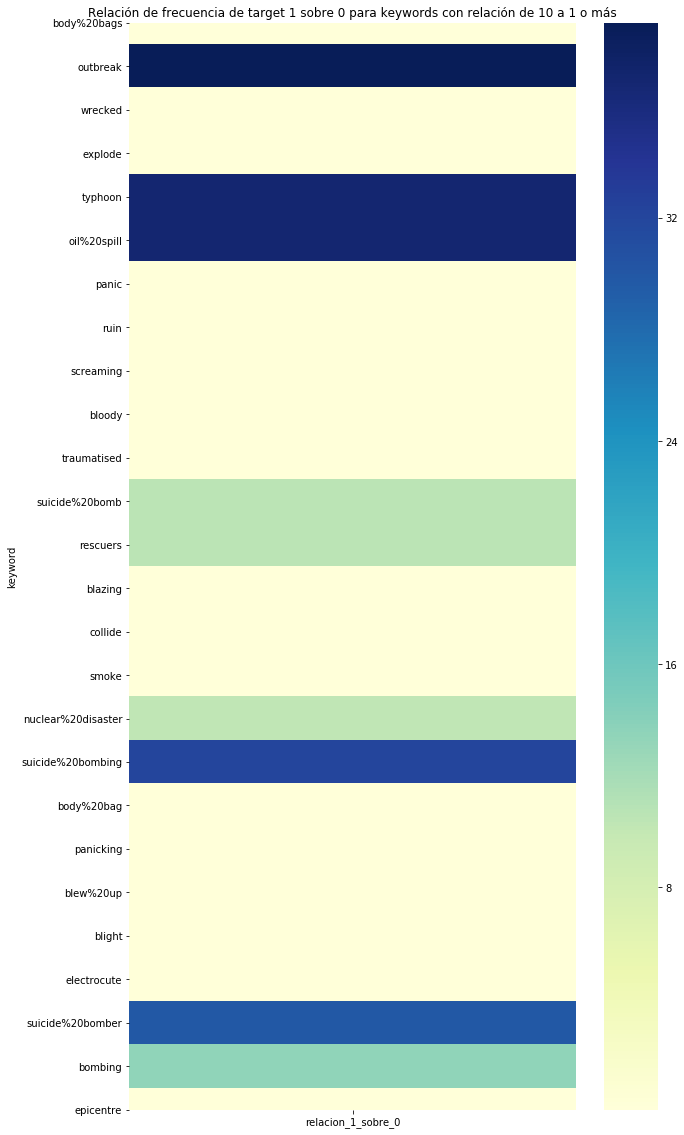

In [20]:
df_heat = df_keywords_casi_unicas.drop(["target_1", "target_0"], axis=1)
df_heat["relacion_1_sobre_0"] = df_heat["relacion_1_sobre_0"].map(lambda x:float(x))
df_heat = df_heat.set_index("keyword")
plt.figure(figsize=(10,20))
plt.title("Relación de frecuencia de target 1 sobre 0 para keywords con relación de 10 a 1 o más")
sns.heatmap(df_heat[["relacion_1_sobre_0"]], cmap="YlGnBu")
plt.show()

Como se pudo ver, hay algunas keywords que son únicas para cada target, y su cantidad es suficientemente alta como para decir que si aparece otra vez, ya sabemos a que target pertenecerá. Por otro lado hay otras que aparecen en ambos pero la cantidad es mucho mayor en uno que en otro, por lo que tenemos una alta probabilidad de adivinar si aparece nuevamente.